In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.utils import get_device
import matplotlib.pyplot as plt

get_device(use_accelerators=False)

'cpu'

In [6]:
import numpy as np
from src.dataset import get_one_magnet, ChiMode, get_data_parallel

data = np.load("../data/isotropic_chi/test/data_1.npz")
X, B = get_one_magnet(data=data, chi_mode=ChiMode.ISOTROPIC)

In [7]:
magnet_idx = 0

grid = X[:,3:]
a = X[0,0]
b = X[0,1]
chi = X[0,2]
B_demag = B[:,:3]
B_reduced = B[:,3:]

In [8]:
a, b, chi

(np.float64(1.7817964606037768),
 np.float64(2.2310112892055325),
 np.float64(0.6027633760716439))

In [ ]:
from src.model import Network, torch

model = Network(in_features=6, hidden_dim_factor=6, out_features=3)
weights_path = "../results/2024-11-11 12:43:50.050543/weights.pt"
model.load_state_dict(torch.load(weights_path, weights_only=True))
model.eval()
B_pred = model(torch.tensor(X)).detach().numpy()

In [24]:
from src.utils import relative_amplitude_error, angle_error

amplitude_errors_baseline = relative_amplitude_error(B_demag, B_reduced, return_abs=False)
amplitude_errors_trained = np.clip(relative_amplitude_error(B_demag, B_pred, return_abs=False), -1e6, 1e6)
# angle_errors = angle_error(B_demag, B_reduced)

(array([6951., 3648., 2531., 1738., 1019.,  619.,  400.,  245.,  131.,
          78.]),
 array([1.63269193e+02, 1.79979616e+04, 3.58326539e+04, 5.36673463e+04,
        7.15020387e+04, 8.93367310e+04, 1.07171423e+05, 1.25006116e+05,
        1.42840808e+05, 1.60675501e+05, 1.78510193e+05]),
 <BarContainer object of 10 artists>)

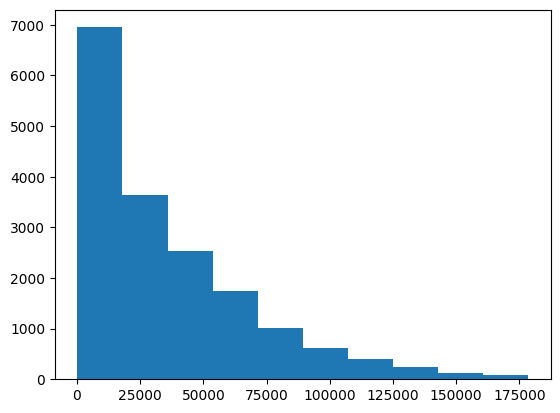

In [25]:
plt.hist(amplitude_errors_trained)

-5.1138685235336325 43864.35579046624


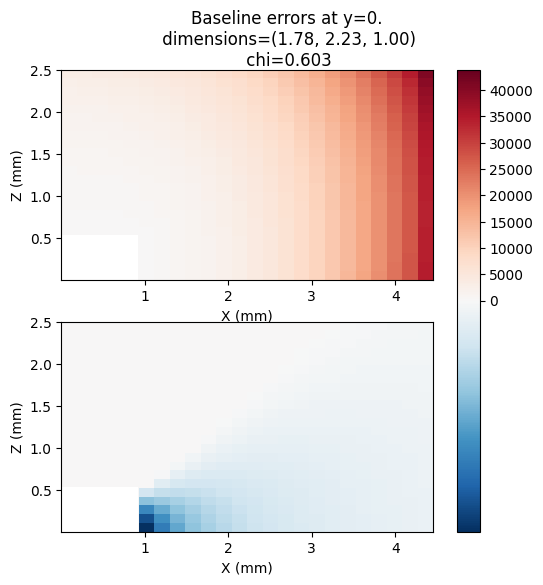

In [26]:
from src.plotting import plot_heatmaps_amplitude

plot_heatmaps_amplitude(grid, amplitude_errors_baseline, amplitude_errors_trained, a, b, chi, trained=False)